# Datos

In [1]:
#paquetes locales diseñados para nuestro caso de estudio
from localpacks.data import get_data 

#utilidades para los mapas
import os
import folium
import contextily as ctx #la usamos para agregar un mapa de fondo

#graicos
import matplotlib.pyplot as plt

### Inspeccionamos nuestros datos

In [2]:
cordoba_sf = get_data()

In [3]:
cordoba_sf.head(3)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,"POLYGON ((3686668.391348725 6672098.301358264,..."
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,"POLYGON ((3651995.370083685 6492136.442240674,..."
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,"POLYGON ((3646477.920536898 6501399.587313074,..."


Podemos observar que los datos corresponden a los de la descripción del **README.md**

## Visualización de Datos

#### 1. Radio Censal Hombres/Mujeres

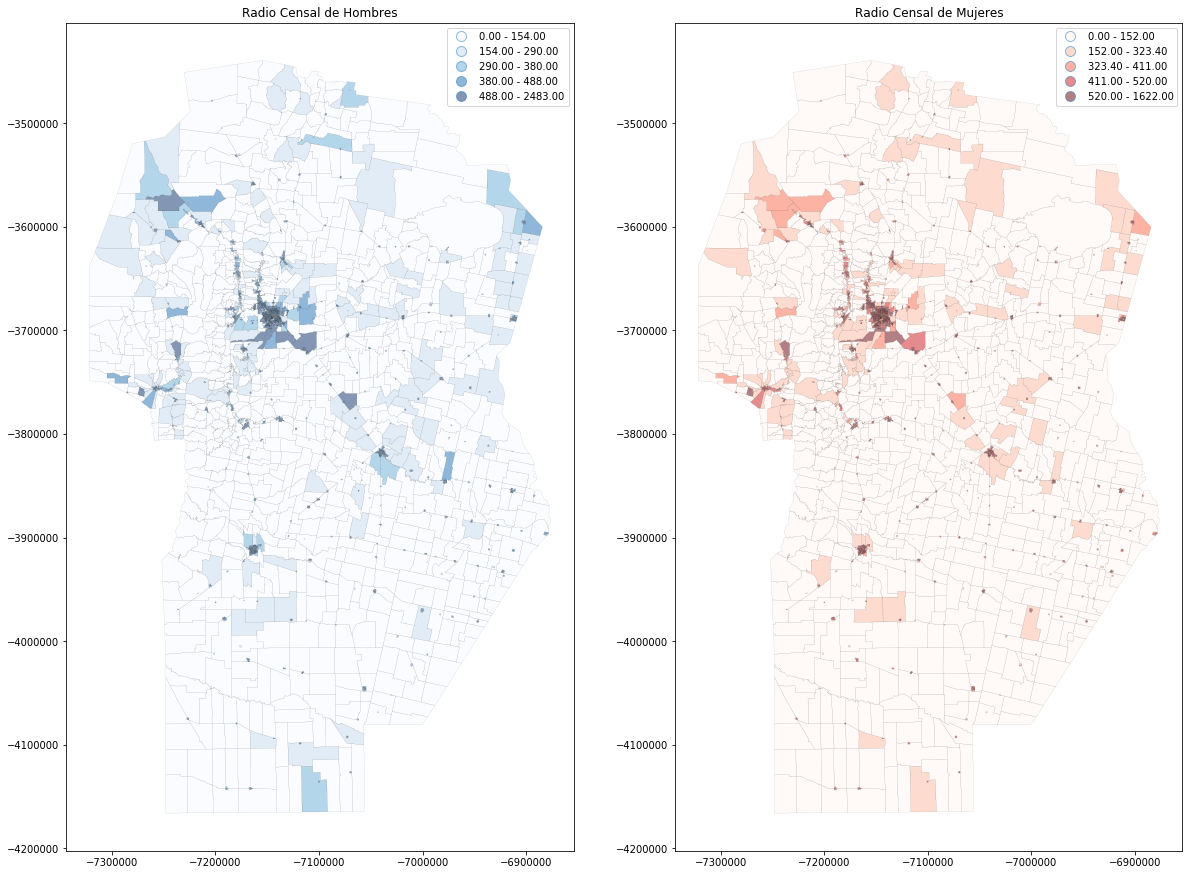

In [13]:
f,ax = plt.subplots(1,2,figsize=(20,20))

#Datos a plotear
cordoba_sf.plot(column='varon', edgecolor='k', ax=ax[0], alpha=.5, cmap='Blues', scheme='quantiles', legend=True, linewidth=.1,)
cordoba_sf.plot(column='mujer', edgecolor='k', ax=ax[1], alpha=.5, cmap='Reds', scheme='quantiles', legend=True, linewidth=.1)

#Datos de los plotters
ax[0].set_title('Radio Censal de Hombres')
ax[1].set_title('Radio Censal de Mujeres')

plt.show();

#### 2. Radio Censal Población Total

#### Agregamos un mapa de fondo

In [8]:
cordoba_sf = cordoba_sf.to_crs(epsg=3857)
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

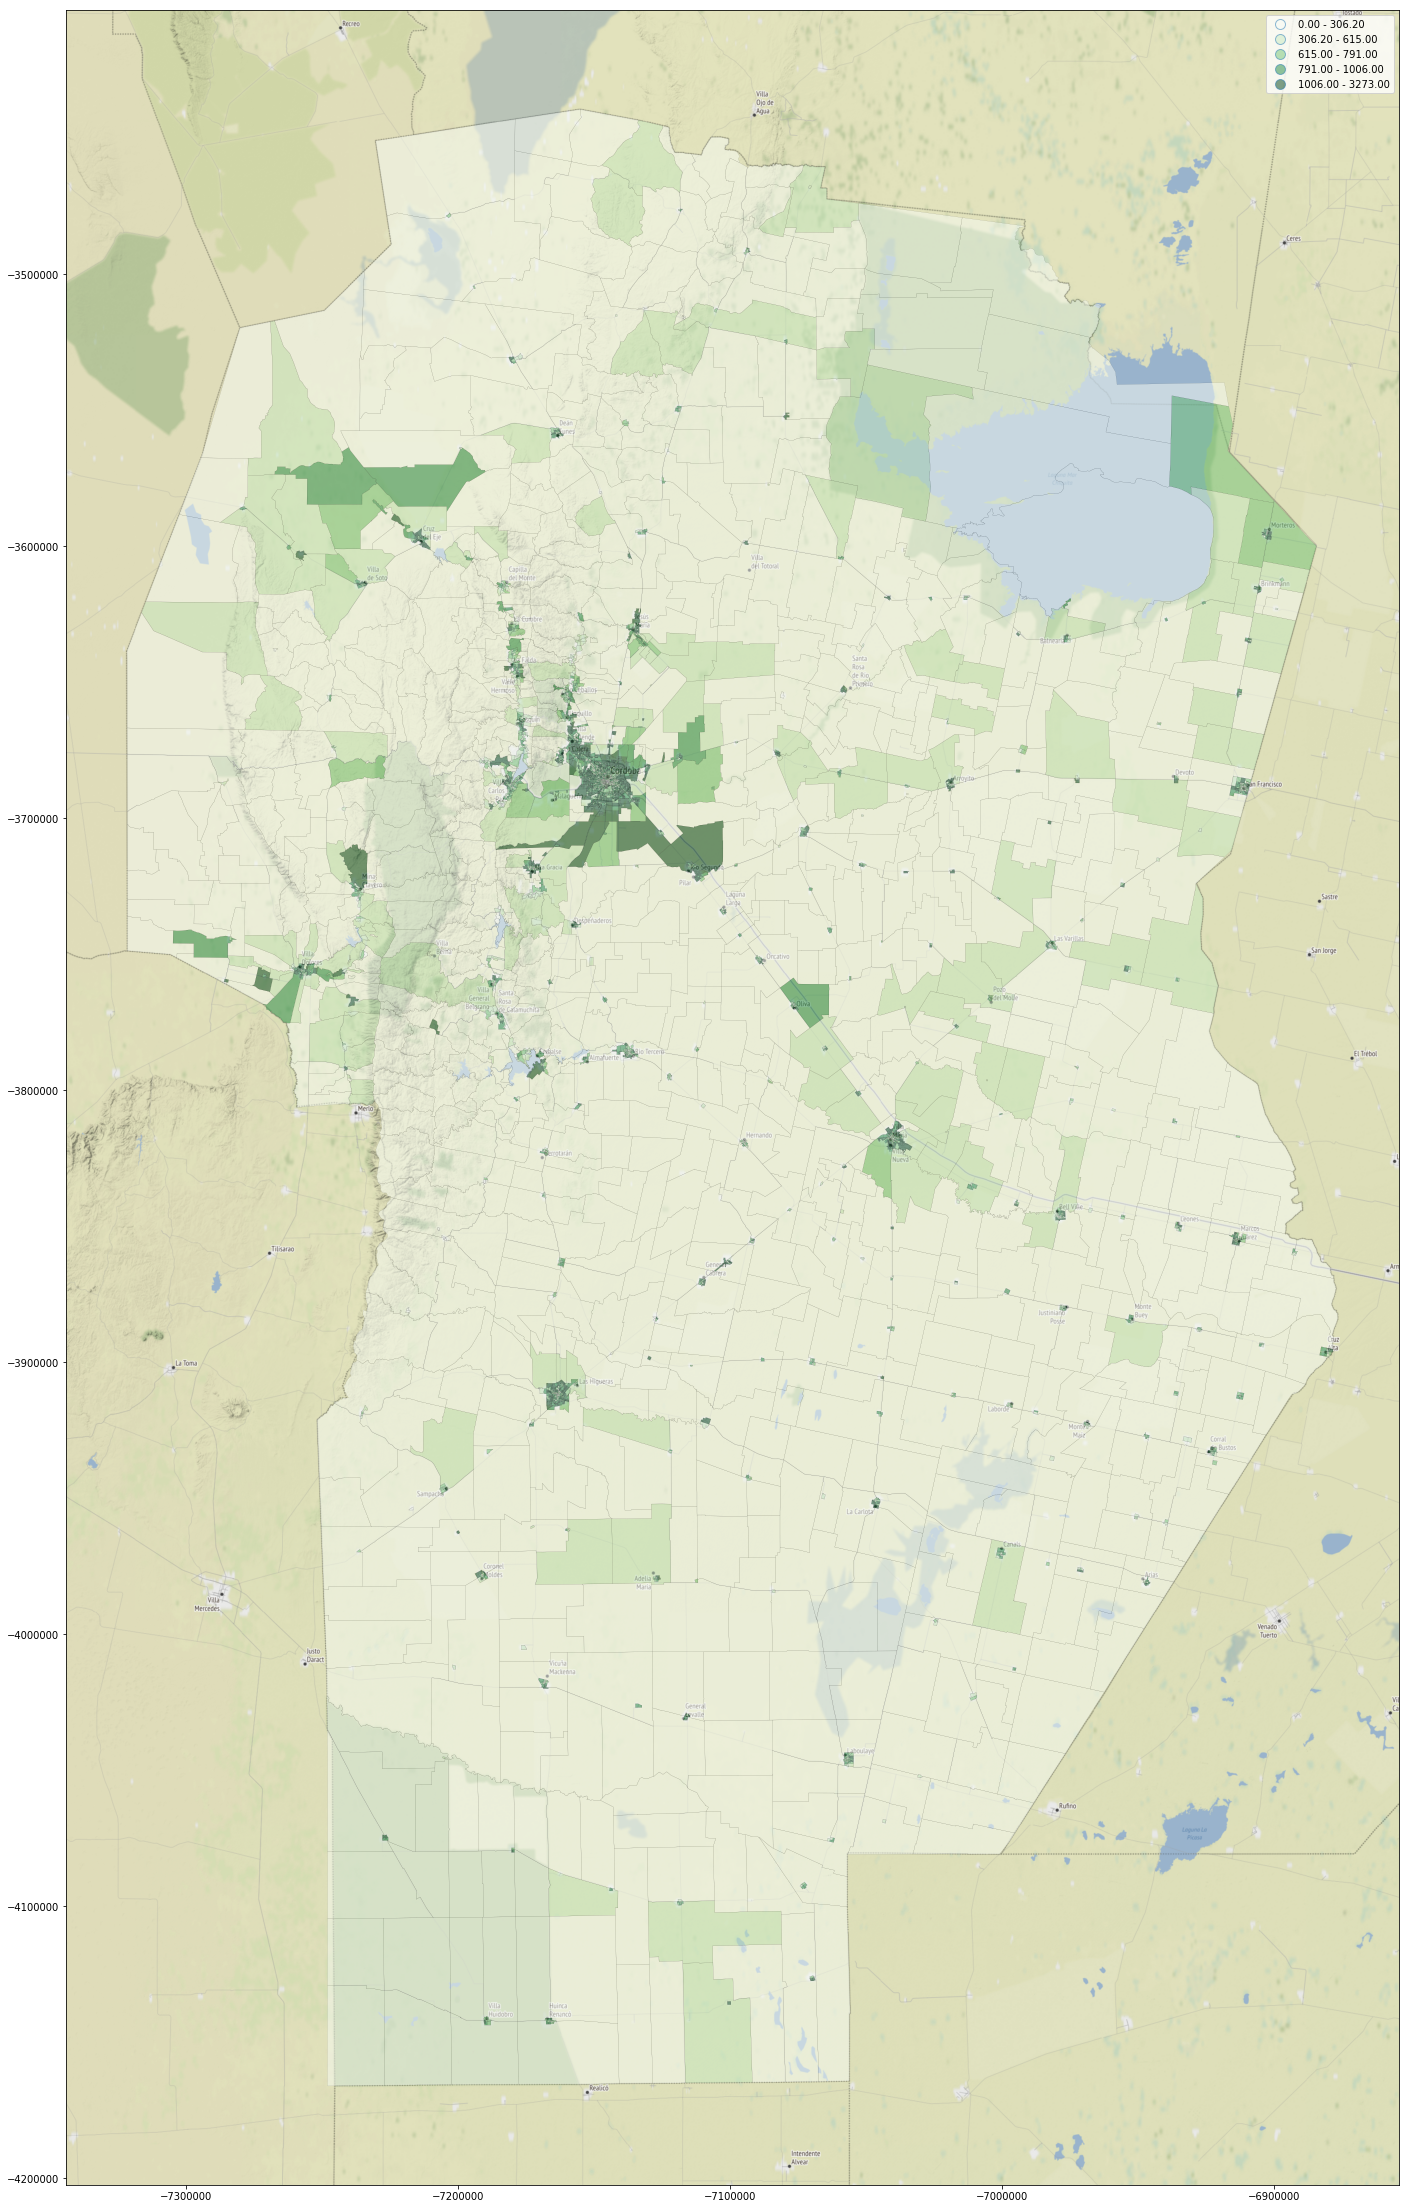

In [17]:
ax = cordoba_sf.plot(column='totalpobl',edgecolor='k', alpha=.5, cmap='Greens',
                     scheme='quantiles', legend=True, linewidth=.1, figsize=(40, 40))
add_basemap(ax, zoom = 10)
#plt.savefig('cordoba_total_poblacion.png', dpi=100, format='png')